# Explore the dataset that we created
- avg rating
- game length
- results breakdown
etc...

In [4]:
import pandas as pd

In [8]:
import csv
# Think about how to best do this? go via the file directory or via the PGN file?

# Think is our PGNs are filter_more, good_games

import chess.pgn

pgn_file = "PGN/good_games.pgn"

headers = []
with open(pgn_file) as f:
    while True:
        game = chess.pgn.read_game(f)
        if game is None:
            break
        headers.append([game.headers.get("Event"), game.headers.get("Result"), game.headers.get("WhiteElo"), game.headers.get("BlackElo"), game.headers.get("Site")]) # .get("Result"))

headers
csv_file = "headers.csv"

with open(csv_file, mode='w', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(["Event", "Result", "WhiteElo", "BlackElo", "Site"])  # Write the header row
    writer.writerows(headers)  # Write the data rows


In [9]:
pgn_file = "PGN/filter_more.pgn"

headers = []
with open(pgn_file) as f:
    while True:
        game = chess.pgn.read_game(f)
        if game is None:
            break
        headers.append([game.headers.get("Event"), game.headers.get("Result"), game.headers.get("WhiteElo"), game.headers.get("BlackElo"), game.headers.get("Site")]) # .get("Result"))

csv_file = "headers.csv"
with open(csv_file, mode='a', newline='') as f:
    writer = csv.writer(f)
    writer.writerows(headers)  # Append the data rows


In [14]:
# TODO: Analyze the puzzles to make sure we are analyzing games that are not actually too difficult, I think this might be an issue namely, want to match the puzzles to the games in the DB.
pass_failed_tests = [0,1,1,0,1,0,0,1,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0]

In [5]:
# Load the puzzles to evaluate on from the CSV file.

df = pd.read_csv('sorted_df_output.csv')
print(df.shape)

def get_puzzle_board(index):
    fen = df.iloc[index]['FEN']
    return chess.Board(fen)

def get_puzzle_solution(index):
    return df.iloc[index]['Moves'].split(" ")[0] # Only the first move

(1000, 10)


In [29]:
passed_sum = 0
failed_sum = 0
passed_count = 0
failed_count = 0

t = 0

for i in range(len(pass_failed_tests)):
    if pass_failed_tests[i] == 0:
        print("FAILED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        failed_count += 1
        failed_sum += df.iloc[i]["Rating"]
        if df.iloc[i]["Rating"] <= 1700:
            t += 1
    else:
        # print("PASSED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        # passed_count += 1
        # passed_sum += df.iloc[i]["Rating"]
        pass

print(failed_sum / failed_count)
print(t)

FAILED:  1740 crushing middlegame pin short
FAILED:  1506 advantage discoveredAttack middlegame short
FAILED:  1663 kingsideAttack mate mateIn2 middlegame sacrifice short
FAILED:  1557 advantage middlegame short trappedPiece
FAILED:  1595 advantage middlegame short trappedPiece
FAILED:  1776 crushing long middlegame
FAILED:  1950 advantage endgame short
FAILED:  1690 crushing middlegame short
FAILED:  1592 advantage long opening
FAILED:  1536 advantage fork opening short
FAILED:  1660 crushing endgame pawnEndgame short
FAILED:  1682 advantage defensiveMove middlegame short
FAILED:  1914 crushing middlegame short
FAILED:  1821 advancedPawn advantage endgame promotion short
FAILED:  1524 advancedPawn advantage discoveredAttack endgame long
FAILED:  1800 advantage opening short
FAILED:  1791 advantage middlegame pin short
FAILED:  1635 crushing endgame oneMove
FAILED:  1651 crushing long middlegame sacrifice
FAILED:  1645 crushing deflection exposedKing long middlegame sacrifice
FAILED:  

In [30]:
t = 0

for i in range(len(pass_failed_tests)):
    if pass_failed_tests[i] == 0:
        # print("FAILED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        # failed_count += 1
        # failed_sum += df.iloc[i]["Rating"]
        pass
    else:
        print("PASSED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        passed_count += 1
        passed_sum += df.iloc[i]["Rating"]
        if df.iloc[i]["Rating"] <= 1700:
            t += 1

print(t)
print(passed_sum / passed_count)

PASSED:  1828 crushing middlegame short
PASSED:  1812 advantage discoveredAttack middlegame short
PASSED:  2129 advantage middlegame short
PASSED:  1651 advantage middlegame short
PASSED:  1513 clearance crushing defensiveMove long middlegame
PASSED:  1544 crushing endgame short
PASSED:  1856 advantage endgame short
PASSED:  1857 advantage middlegame short
PASSED:  1619 crushing endgame long
PASSED:  1662 crushing middlegame pin short
PASSED:  1642 advantage endgame short
PASSED:  1543 equality long middlegame
PASSED:  1765 advantage middlegame short
PASSED:  1601 attraction crushing fork long middlegame sacrifice
8
1715.857142857143


In [31]:
pass_failed_tests += [1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]


In [36]:
len(pass_failed_tests)

100

In [38]:
passed_sum = 0
failed_sum = 0
passed_count = 0
failed_count = 0

t = 0

for i in range(len(pass_failed_tests)):
    if pass_failed_tests[i] == 0:
        print("FAILED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        failed_count += 1
        failed_sum += df.iloc[i]["Rating"]
        if df.iloc[i]["Rating"] <= 1700 and ("advantage" in df.iloc[i]["Themes"]):
            t += 1
    else:
        # print("PASSED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        # passed_count += 1
        # passed_sum += df.iloc[i]["Rating"]
        pass

print(failed_sum / failed_count)
print(t)

FAILED:  1740 crushing middlegame pin short
FAILED:  1506 advantage discoveredAttack middlegame short
FAILED:  1663 kingsideAttack mate mateIn2 middlegame sacrifice short
FAILED:  1557 advantage middlegame short trappedPiece
FAILED:  1595 advantage middlegame short trappedPiece
FAILED:  1776 crushing long middlegame
FAILED:  1950 advantage endgame short
FAILED:  1690 crushing middlegame short
FAILED:  1592 advantage long opening
FAILED:  1536 advantage fork opening short
FAILED:  1660 crushing endgame pawnEndgame short
FAILED:  1682 advantage defensiveMove middlegame short
FAILED:  1914 crushing middlegame short
FAILED:  1821 advancedPawn advantage endgame promotion short
FAILED:  1524 advancedPawn advantage discoveredAttack endgame long
FAILED:  1800 advantage opening short
FAILED:  1791 advantage middlegame pin short
FAILED:  1635 crushing endgame oneMove
FAILED:  1651 crushing long middlegame sacrifice
FAILED:  1645 crushing deflection exposedKing long middlegame sacrifice
FAILED:  

In [40]:
t = 0

for i in range(len(pass_failed_tests)):
    if pass_failed_tests[i] == 0:
        # print("FAILED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        # failed_count += 1
        # failed_sum += df.iloc[i]["Rating"]
        pass
    else:
        print("PASSED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        passed_count += 1
        passed_sum += df.iloc[i]["Rating"]
        if df.iloc[i]["Rating"] <= 1700 and ("advantage" in df.iloc[i]["Themes"]):
            t += 1

print(t)
print(passed_sum / passed_count)

PASSED:  1828 crushing middlegame short
PASSED:  1812 advantage discoveredAttack middlegame short
PASSED:  2129 advantage middlegame short
PASSED:  1651 advantage middlegame short
PASSED:  1513 clearance crushing defensiveMove long middlegame
PASSED:  1544 crushing endgame short
PASSED:  1856 advantage endgame short
PASSED:  1857 advantage middlegame short
PASSED:  1619 crushing endgame long
PASSED:  1662 crushing middlegame pin short
PASSED:  1642 advantage endgame short
PASSED:  1543 equality long middlegame
PASSED:  1765 advantage middlegame short
PASSED:  1601 attraction crushing fork long middlegame sacrifice
PASSED:  1513 advantage defensiveMove endgame knightEndgame short
PASSED:  1790 advantage middlegame oneMove
PASSED:  1800 backRankMate endgame hangingPiece mate mateIn2 short
PASSED:  1800 advantage middlegame short
PASSED:  1916 advantage middlegame veryLong
PASSED:  1593 advantage fork middlegame short
PASSED:  1848 advantage long middlegame
PASSED:  1680 advantage middleg

In [ ]:
# TODO: Need to analyze the data and see if there is an imbalance

In [45]:
b_count = [0,0]
w_count = [0,0]

for i in range(100):
    # print(df.iloc[i]["FEN"]) 
    if df.iloc[i]["FEN"].split(" ")[1] == "b":
        b_count[pass_failed_tests[i]] += 1
    else:
        w_count[pass_failed_tests[i]] += 1

print("f | c")
print(b_count)
print(w_count)

f | c
[35, 18]
[26, 21]


In [48]:
b_count = [0,0]
w_count = [0,0]

for i in range(100):
    if "advantage" not in df.iloc[i]["Themes"]:
        continue
    
    if df.iloc[i]["FEN"].split(" ")[1] == "b":
        b_count[pass_failed_tests[i]] += 1
    else:
        w_count[pass_failed_tests[i]] += 1

print("f | c")
print(b_count)
print(w_count)

f | c
[23, 11]
[16, 15]


Seems like we are better at classifying white positions? That are below 1700 and are tagged as "advantage".

# Player stats

In [51]:
# Read the CSV file
df = pd.read_csv('headers.csv')

# Calculate the average white elo
avg_white_elo = df['WhiteElo'].mean()

# Calculate the average black elo
avg_black_elo = df['BlackElo'].mean()

print(avg_white_elo, avg_black_elo)


1847.2956327646882 1847.4024649600083


<Axes: >

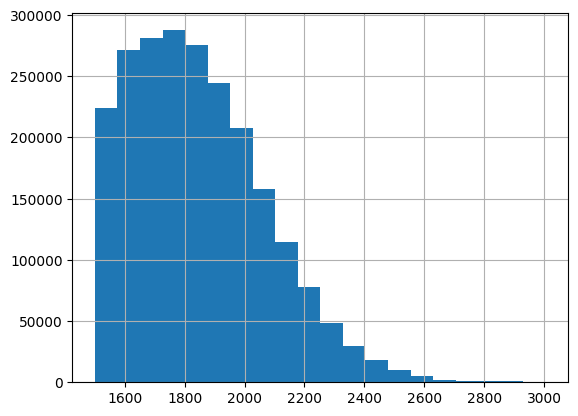

In [58]:
import matplotlib.pyplot as plt
df['WhiteElo'].hist(bins=20)

<Axes: >

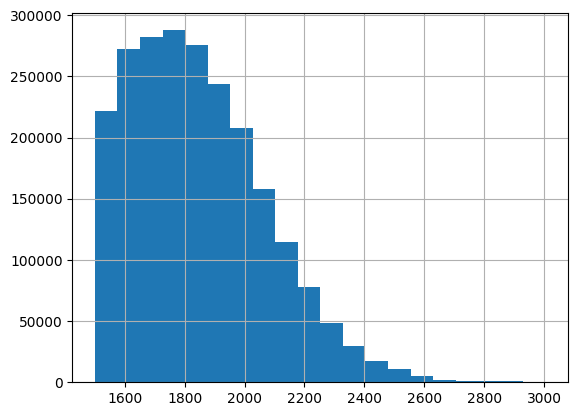

In [59]:
df['BlackElo'].hist(bins=20)

# Puzzle stats

In [60]:
import pandas as pd

# Read the CSV file
df = pd.read_csv('sorted_df_output.csv')

# Calculate the average puzzle rating
avg_puzzle_rating = df['Rating'].mean()

# Display the average puzzle rating
print(avg_puzzle_rating)


1764.148


<Axes: >

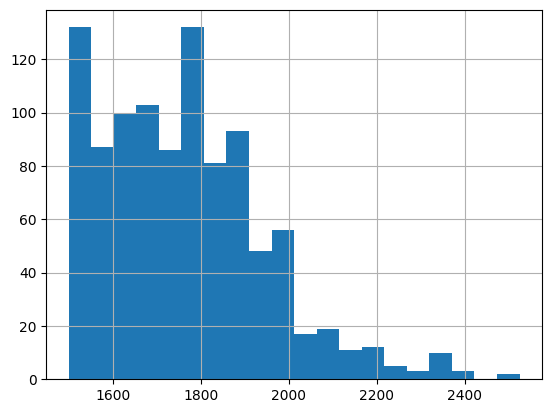

In [61]:
df['Rating'].hist(bins=20)

In [62]:
# Count the number of puzzles for black and white
black_count = df[df['FEN'].str.split().str[1] == 'b'].shape[0]
white_count = df[df['FEN'].str.split().str[1] == 'w'].shape[0]

# Output the counts
print("Number of puzzles for black:", black_count)
print("Number of puzzles for white:", white_count)


Number of puzzles for black: 517
Number of puzzles for white: 483


Pretty balanced

In [63]:
filtered_games = df[df['Rating'] <= 1600]
filtered_games.to_csv('sub1600_games.csv', index=False)


In [64]:
black_count = filtered_games[filtered_games['FEN'].str.split().str[1] == 'b'].shape[0]
white_count = filtered_games[filtered_games['FEN'].str.split().str[1] == 'w'].shape[0]

print("Number of puzzles for black:", black_count)
print("Number of puzzles for white:", white_count)


Number of puzzles for black: 117
Number of puzzles for white: 97


In [1]:
pass_failed_tests = [1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1]

In [6]:
passed_sum = 0
failed_sum = 0
passed_count = 0
failed_count = 0

t = 0

for i in range(len(pass_failed_tests)):
    if pass_failed_tests[i] == 0:
        print("FAILED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        failed_count += 1
        failed_sum += df.iloc[i]["Rating"]
        if df.iloc[i]["Rating"] <= 1700 and ("advantage" in df.iloc[i]["Themes"]):
            t += 1
    else:
        # print("PASSED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        # passed_count += 1
        # passed_sum += df.iloc[i]["Rating"]
        pass

print(failed_sum / failed_count)
print(t)

FAILED:  1506 advantage discoveredAttack middlegame short
FAILED:  1651 advantage middlegame short
FAILED:  1544 crushing endgame short
FAILED:  1856 advantage endgame short
FAILED:  1857 advantage middlegame short
FAILED:  1950 advantage endgame short
FAILED:  1690 crushing middlegame short
FAILED:  1682 advantage defensiveMove middlegame short
FAILED:  1662 crushing middlegame pin short
FAILED:  1642 advantage endgame short
FAILED:  1635 crushing endgame oneMove
FAILED:  1651 crushing long middlegame sacrifice
FAILED:  1984 advantage defensiveMove long middlegame
FAILED:  1744 advantage endgame long
FAILED:  1800 backRankMate endgame hangingPiece mate mateIn2 short
FAILED:  1800 advantage middlegame short
FAILED:  1801 advantage middlegame short
FAILED:  1916 advantage middlegame veryLong
FAILED:  1848 advantage long middlegame
FAILED:  1515 advantage endgame short
FAILED:  1917 advancedPawn crushing endgame hangingPiece oneMove
FAILED:  1770 advantage defensiveMove endgame long
FAIL

In [7]:
t = 0

for i in range(len(pass_failed_tests)):
    if pass_failed_tests[i] == 0:
        # print("FAILED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        # failed_count += 1
        # failed_sum += df.iloc[i]["Rating"]
        pass
    else:
        print("PASSED: ", df.iloc[i]["Rating"], df.iloc[i]["Themes"])
        passed_count += 1
        passed_sum += df.iloc[i]["Rating"]
        if df.iloc[i]["Rating"] <= 1700:
            t += 1

print(t)
print(passed_sum / passed_count)

PASSED:  1740 crushing middlegame pin short
PASSED:  1828 crushing middlegame short
PASSED:  1812 advantage discoveredAttack middlegame short
PASSED:  2129 advantage middlegame short
PASSED:  1663 kingsideAttack mate mateIn2 middlegame sacrifice short
PASSED:  1557 advantage middlegame short trappedPiece
PASSED:  1513 clearance crushing defensiveMove long middlegame
PASSED:  1595 advantage middlegame short trappedPiece
PASSED:  1776 crushing long middlegame
PASSED:  1619 crushing endgame long
PASSED:  1592 advantage long opening
PASSED:  1536 advantage fork opening short
PASSED:  1660 crushing endgame pawnEndgame short
PASSED:  1914 crushing middlegame short
PASSED:  1821 advancedPawn advantage endgame promotion short
PASSED:  1524 advancedPawn advantage discoveredAttack endgame long
PASSED:  1800 advantage opening short
PASSED:  1791 advantage middlegame pin short
PASSED:  1645 crushing deflection exposedKing long middlegame sacrifice
PASSED:  1667 advantage hangingPiece middlegame pi

In [8]:
b_count = [0,0]
w_count = [0,0]

for i in range(100):
    # print(df.iloc[i]["FEN"]) 
    if df.iloc[i]["FEN"].split(" ")[1] == "b":
        b_count[pass_failed_tests[i]] += 1
    else:
        w_count[pass_failed_tests[i]] += 1

print("f | c")
print(b_count) # W
print(w_count) # B

f | c
[15, 38]
[22, 25]


# Serialization experiment

In [1]:
string_list = "[0.6, Move.from_uci('e7c5'), [[42.50636672973633, <Outcome.BLACK_WON: -1>, 'https://lichess.org/3lEsQvLU#34', 'kg8 rf8 qd8 rc8 ph7 pg7 pf7 nf6 pa6 Pf5 pd5 bc5 pb5 Pe4 Qd4 Ph3 Bd3 Nc3 Pa3 Pg2 Pc2 Pb2 Kg1 Rf1 Ra1 '], [41.92009735107422, Outcome.WHITE_WON, 'https://lichess.org/NtROTkkp#42', 'kg8 rc8 rb8 ph7 pg7 pf7 qd7 nf6 pb6 pd5 bc5 Pb5 pa5 Pe4 Qd4 Pa4 Pg3 Nc3 Ph2 Kg2 Pf2 Bb2 Rd1 Rc1 '], [41.68668746948242, <Outcome.BLACK_WON: -1>, 'https://lichess.org/hsII84BL#29', 'kg8 rf8 rc8 ph7 pg7 pf7 be7 qd7 pb7 nf6 pe6 pa6 Bg5 pd5 Pf4 Pd4 Pa4 Ph3 Nc3 Pg2 Qe2 Pc2 Pb2 Kg1 Rf1 Re1 '], [41.56430435180664, <Outcome.BLACK_WON: -1>, 'https://lichess.org/VoxEixrZ#32', 'kg8 rf8 ra8 ph7 pg7 pf7 qc7 bb7 pe6 pa6 pd5 bc5 pb5 Pg4 Pf4 Pe4 Qd4 Nc3 Pa3 Pg2 Pc2 Pb2 Ba2 Kg1 Rf1 Rd1 Bc1 '], [41.562225341796875, Outcome.WHITE_WON, 'https://lichess.org/v85b1iMi#32', 'kg8 rf8 rc8 ph7 pg7 pf7 qd7 pb7 pe6 pa6 nf5 Pe5 pd5 bc5 Qg4 Pf4 Nc3 Pa3 Ph2 Pg2 Bd2 Pb2 Kh1 Rf1 Ra1 ']]]"

In [6]:
string_list = string_list.replace("<Outcome.WHITE_WON: 1>", "Outcome.WHITE_WON").replace("<Outcome.BLACK_WON: -1>", "Outcome.WHITE_WON")


In [7]:
string_list

"[0.6, Move.from_uci('e7c5'), [[42.50636672973633, Outcome.WHITE_WON, 'https://lichess.org/3lEsQvLU#34', 'kg8 rf8 qd8 rc8 ph7 pg7 pf7 nf6 pa6 Pf5 pd5 bc5 pb5 Pe4 Qd4 Ph3 Bd3 Nc3 Pa3 Pg2 Pc2 Pb2 Kg1 Rf1 Ra1 '], [41.92009735107422, Outcome.WHITE_WON, 'https://lichess.org/NtROTkkp#42', 'kg8 rc8 rb8 ph7 pg7 pf7 qd7 nf6 pb6 pd5 bc5 Pb5 pa5 Pe4 Qd4 Pa4 Pg3 Nc3 Ph2 Kg2 Pf2 Bb2 Rd1 Rc1 '], [41.68668746948242, Outcome.WHITE_WON, 'https://lichess.org/hsII84BL#29', 'kg8 rf8 rc8 ph7 pg7 pf7 be7 qd7 pb7 nf6 pe6 pa6 Bg5 pd5 Pf4 Pd4 Pa4 Ph3 Nc3 Pg2 Qe2 Pc2 Pb2 Kg1 Rf1 Re1 '], [41.56430435180664, Outcome.WHITE_WON, 'https://lichess.org/VoxEixrZ#32', 'kg8 rf8 ra8 ph7 pg7 pf7 qc7 bb7 pe6 pa6 pd5 bc5 pb5 Pg4 Pf4 Pe4 Qd4 Nc3 Pa3 Pg2 Pc2 Pb2 Ba2 Kg1 Rf1 Rd1 Bc1 '], [41.562225341796875, Outcome.WHITE_WON, 'https://lichess.org/v85b1iMi#32', 'kg8 rf8 rc8 ph7 pg7 pf7 qd7 pb7 pe6 pa6 nf5 Pe5 pd5 bc5 Qg4 Pf4 Nc3 Pa3 Ph2 Pg2 Bd2 Pb2 Kh1 Rf1 Ra1 ']]]"

In [24]:
import chess
from chess import Move
from enum import Enum

class Outcome(Enum):
    WHITE_WON = 1
    BLACK_WON = -1
    DRAW = 0
    
    # TODO: Why is this not the default representation??
    def __repr__(self) -> str:
        return f"Outcome.{self.name}"

list_list = eval(string_list)

In [25]:
eval(str(list_list))

[0.6,
 Move.from_uci('e7c5'),
 [[42.50636672973633,
   Outcome.WHITE_WON,
   'https://lichess.org/3lEsQvLU#34',
   'kg8 rf8 qd8 rc8 ph7 pg7 pf7 nf6 pa6 Pf5 pd5 bc5 pb5 Pe4 Qd4 Ph3 Bd3 Nc3 Pa3 Pg2 Pc2 Pb2 Kg1 Rf1 Ra1 '],
  [41.92009735107422,
   Outcome.WHITE_WON,
   'https://lichess.org/NtROTkkp#42',
   'kg8 rc8 rb8 ph7 pg7 pf7 qd7 nf6 pb6 pd5 bc5 Pb5 pa5 Pe4 Qd4 Pa4 Pg3 Nc3 Ph2 Kg2 Pf2 Bb2 Rd1 Rc1 '],
  [41.68668746948242,
   Outcome.WHITE_WON,
   'https://lichess.org/hsII84BL#29',
   'kg8 rf8 rc8 ph7 pg7 pf7 be7 qd7 pb7 nf6 pe6 pa6 Bg5 pd5 Pf4 Pd4 Pa4 Ph3 Nc3 Pg2 Qe2 Pc2 Pb2 Kg1 Rf1 Re1 '],
  [41.56430435180664,
   Outcome.WHITE_WON,
   'https://lichess.org/VoxEixrZ#32',
   'kg8 rf8 ra8 ph7 pg7 pf7 qc7 bb7 pe6 pa6 pd5 bc5 pb5 Pg4 Pf4 Pe4 Qd4 Nc3 Pa3 Pg2 Pc2 Pb2 Ba2 Kg1 Rf1 Rd1 Bc1 '],
  [41.562225341796875,
   Outcome.WHITE_WON,
   'https://lichess.org/v85b1iMi#32',
   'kg8 rf8 rc8 ph7 pg7 pf7 qd7 pb7 pe6 pa6 nf5 Pe5 pd5 bc5 Qg4 Pf4 Nc3 Pa3 Ph2 Pg2 Bd2 Pb2 Kh1 Rf1 Ra1 ']]]

Works very very nice.
So we should be able to calculate the map and p@3 for all the experiments we ran so far.